# Utilizando pandas y bokeh (error)

In [2]:
import dask.dataframe as dd
import pandas as pd

In [4]:
import numpy as np
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import NumeralTickFormatter

# Activar visualización en el notebook
output_notebook()

Loading BokehJS ...

## Extraer solo columnas subject_id y anchor_age (anterior)

In [ ]:
# Dtypes para que no haya error al leer el CSV
dtypes = {
    'amount': 'object',
    'caregiver_id': 'object',
    'charttime': 'object',
    'description': 'object',
    'disp_sched': 'object',
    'dispensation': 'object',
    'dose_unit_rx': 'object',
    'drg_type': 'object',
    'drug': 'object',
    'drug_type': 'object',
    'duration_interval': 'object',
    'entertime': 'object',
    'expiration_unit': 'object',
    'form_unit_disp': 'object',
    'formulary_drug_cd': 'object',
    'frequency': 'object',
    'itemid': 'object',
    'linkorderid': 'object',
    'medication': 'object',
    'note_id': 'object',
    'note_type': 'object',
    'order_provider_id': 'object',
    'originalamount': 'object',
    'originalrate': 'object',
    'poe_id': 'object',
    'proc_type': 'object',
    'prod_strength': 'object',
    'rate': 'object',
    'route': 'object',
    'status': 'object',
    'stoptime': 'object',
    'text': 'object',
    'value': 'object',
    'valueuom': 'object',
    'verifiedtime': 'object'
}

df = dd.read_csv('/datos_compartidos/RaulDatosMedicos/datasets/union_hosp_icu_notes/final_dataset.csv', dtype=dtypes)

df.head()

,subject_id,hadm_id,stay_id,caregiver_id,starttime,endtime,storetime,itemid,amount,amountuom,...,category_3,category_4,category_5,section_name,category_1_name,category_2_name,category_3_name,category_4_name,chapter_name,super_section_name
0,10000032,29079034.0,39553978.0,18704.0,2180-07-23 17:00:00,2180-07-23 17:01:00,2180-07-23 18:56:00,220490.0,200.0,mL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10000032,29079034.0,39553978.0,18704.0,2180-07-23 17:00:00,2180-07-23 17:01:00,2180-07-23 18:56:00,227075.0,200.0,mL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10000032,29079034.0,39553978.0,18704.0,2180-07-23 17:00:00,2180-07-23 17:30:00,2180-07-23 17:02:00,220490.0,49.999998807907104,mL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000032,29079034.0,39553978.0,18704.0,2180-07-23 17:00:00,2180-07-23 17:30:00,2180-07-23 17:02:00,226509.0,49.999998807907104,mL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10000032,29079034.0,39553978.0,18704.0,2180-07-23 17:33:00,2180-07-23 18:03:00,2180-07-23 18:16:00,220490.0,49.999998807907104,mL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Imprimir el nombre de todas las columnas
for col in df.columns:
    print(col)

subject_id
hadm_id
stay_id
caregiver_id
starttime
endtime
storetime
itemid
amount
amountuom
rate
rateuom
orderid
linkorderid
statusdescription
originalamount
originalrate
charttime
value
valuenum
valueuom
warning
first_careunit
last_careunit
intime
outtime
los
chartdate
hcpcs_cd
seq_num
short_description
admittime
dischtime
deathtime
admission_type
admit_provider_id
admission_location
discharge_location
insurance
language
marital_status
race
edregtime
edouttime
hospital_expire_flag
gender
anchor_age
anchor_year
anchor_year_group
dod
transfer_id
eventtype
careunit
icd_code
icd_version
drg_type
drg_code
description
drg_severity
drg_mortality
labevent_id
specimen_id
order_provider_id
ref_range_lower
ref_range_upper
flag
priority
comments
emar_id
emar_seq
poe_id
pharmacy_id
enter_provider_id
medication
event_txt
scheduletime
microevent_id
micro_specimen_id
spec_itemid
spec_type_desc
test_seq
storedate
test_itemid
test_name
org_itemid
org_name
isolate_num
quantity
ab_itemid
ab_name
dilution

Crear archivo CSV con los datos de edad

In [3]:
chunk_size = 200000
columnas_extraidas = ['subject_id', 'anchor_age']

chunks = pd.read_csv('/datos_compartidos/RaulDatosMedicos/datasets/union_hosp_icu_notes/final_dataset.csv', usecols=columnas_extraidas, chunksize=chunk_size, low_memory=False)

for i, chunk in enumerate(chunks):
    if i == 0:
        chunk.to_csv('./analysis/age.csv', index=False, mode='w')
        print("Creando el archivo CSV por primera vez.")
    else:
        chunk.to_csv('./analysis/age.csv', index=False, mode='a', header=False)
        print(f"Agregando chunk {i} al archivo CSV.")


Creando el archivo CSV por primera vez.
Agregando chunk 1 al archivo CSV.
Agregando chunk 2 al archivo CSV.
Agregando chunk 3 al archivo CSV.
Agregando chunk 4 al archivo CSV.
Agregando chunk 5 al archivo CSV.
Agregando chunk 6 al archivo CSV.
Agregando chunk 7 al archivo CSV.
Agregando chunk 8 al archivo CSV.
Agregando chunk 9 al archivo CSV.
Agregando chunk 10 al archivo CSV.
Agregando chunk 11 al archivo CSV.
Agregando chunk 12 al archivo CSV.
Agregando chunk 13 al archivo CSV.
Agregando chunk 14 al archivo CSV.
Agregando chunk 15 al archivo CSV.
Agregando chunk 16 al archivo CSV.
Agregando chunk 17 al archivo CSV.
Agregando chunk 18 al archivo CSV.
Agregando chunk 19 al archivo CSV.
Agregando chunk 20 al archivo CSV.
Agregando chunk 21 al archivo CSV.
Agregando chunk 22 al archivo CSV.
Agregando chunk 23 al archivo CSV.
Agregando chunk 24 al archivo CSV.
Agregando chunk 25 al archivo CSV.
Agregando chunk 26 al archivo CSV.
Agregando chunk 27 al archivo CSV.
Agregando chunk 28 al ar

Crear csv que contiene las filas con anchor_year_group 2017-2019

In [35]:
df = dd.read_csv('/datos_compartidos/RaulDatosMedicos/datasets/union_hosp_icu_notes/hosp_dataset_sub4.csv',
                 usecols=['subject_id', 'anchor_year_group'],
                 dtype={
                     'subject_id': 'int64', 
                     'anchor_year_group': 'object'
                 })

df['anchor_year_group'].unique().compute()

0    2020 - 2022
1    2011 - 2013
0    2014 - 2016
1    2008 - 2010
0    2017 - 2019
0           <NA>
Name: anchor_year_group, dtype: string

In [7]:
df = dd.read_csv('/datos_compartidos/RaulDatosMedicos/datasets/union_hosp_icu_notes/hosp_dataset_sub4.csv',
                 usecols=['subject_id', 'anchor_year_group'],
                 dtype={
                     'subject_id': 'int64', 
                     'anchor_year_group': 'object'
                 })

df['anchor_year_group'].unique().compute()

0    2020 - 2022
1    2011 - 2013
0    2014 - 2016
1    2008 - 2010
0    2017 - 2019
0           <NA>
Name: anchor_year_group, dtype: string

In [3]:
# Leer en chunks de 800,000 filas
chunk_size = 800_000

# Leer por partes
primer_chunk = True
for chunk in pd.read_csv("/datos_compartidos/RaulDatosMedicos/datasets/union_hosp_icu_notes/hosp_dataset_sub4.csv", 
                         chunksize=chunk_size, low_memory=False):
    # Filtrar filas que contengan exactamente '2017 - 2019'
    filtered = chunk[chunk['anchor_year_group'] == '2017 - 2019']
    
    # Guardar el nuevo conjunto de datos
    filtered.to_csv(f"./analysis/anios_2017_2019.csv",mode='w' if primer_chunk else 'a', index=False, header=primer_chunk)
    primer_chunk = False
    print(f"Agregando chunk {chunk.index[0]} al archivo CSV.")

new_total_rows = sum(1 for _ in open(f"./analysis/anios_2017_2019.csv")) - 1
print(f"Guardado: ./analysis/anios_2017_2019 ({new_total_rows} filas)")

Agregando chunk 0 al archivo CSV.
Agregando chunk 800000 al archivo CSV.
Agregando chunk 1600000 al archivo CSV.
Agregando chunk 2400000 al archivo CSV.
Agregando chunk 3200000 al archivo CSV.
Guardado: ./analysis/anios_2017_2019 (49353 filas)


## Extraer histograma de edad

In [ ]:
import pandas as pd

# Cargar los datos
df = pd.read_csv('/home/raulmartinez/medicalReports/datasets/hosp/merge_admissions_notes_patients.csv', 
                 usecols=['subject_id', 'anchor_age'])

# Convertir 'anchor_age' a numérico para manejar errores
df['anchor_age'] = pd.to_numeric(df['anchor_age'], errors='coerce')

# Convertir a int64 para permitir NaN
df['anchor_age'] = df['anchor_age'].astype('int64')

# Definir los bins
bins = list(range(0, 101, 10))

# Asignar bins como string (para que se impriman bien)
df['age_bin'] = pd.cut(df['anchor_age'], bins=bins).astype(str)

# Contar valores
hist = df['age_bin'].value_counts().sort_index()

print(hist)

age_bin
(10, 20]      11807
(20, 30]      53221
(30, 40]      56023
(40, 50]      72210
(50, 60]     102180
(60, 70]     105673
(70, 80]      81713
(80, 90]      48419
(90, 100]     14782
Name: count, dtype: int64


In [14]:
# Preparar los datos para Bokeh
x = [str(interval) for interval in hist.index]
y = hist.values

p = figure(x_range=x, title="Histograma de Edades", 
           toolbar_location=None, tools="")
p.vbar(x=x, top=y, width=0.9)
p.xaxis.major_label_orientation = 1.2
p.yaxis.formatter = NumeralTickFormatter(format="0,0")

show(p)

In [27]:
frequencies = df['anchor_age'].value_counts()
frequencies = frequencies.sort_index()
print(frequencies)

anchor_age
18     2279
19     3834
20     5694
21     4891
22     5076
      ...  
86     5347
87     4510
88     4172
89     2661
91    14782
Name: count, Length: 73, dtype: int64


In [30]:
x = frequencies.index.astype(str).tolist()
y = frequencies.values.tolist()

p = figure(x_range=x, title="Frecuencia de edades", 
           toolbar_location=None, tools="", height=400, width=900)

p.vbar(x=x, top=y, width=0.9, color="cornflowerblue")
p.xaxis.major_label_orientation = 1.2
p.yaxis.formatter = NumeralTickFormatter(format="0,0")
p.xaxis.axis_label = "Edades"
p.yaxis.axis_label = "Frecuencia"

show(p)

## Grafica de localizacion de admision

In [16]:
import pandas as pd

# Cargar los datos
df = pd.read_csv('/home/raulmartinez/medicalReports/datasets/hosp/merge_admissions_notes_patients.csv', 
                 usecols=['admission_location'])

# Contar la frecuencias
frequencies = df['admission_location'].value_counts()
print(frequencies)

admission_location
EMERGENCY ROOM                            244179
PHYSICIAN REFERRAL                        163228
TRANSFER FROM HOSPITAL                     56227
WALK-IN/SELF REFERRAL                      42365
CLINIC REFERRAL                            12965
PROCEDURE SITE                              8518
TRANSFER FROM SKILLED NURSING FACILITY      6317
INTERNAL TRANSFER TO OR FROM PSYCH          5837
PACU                                        5734
INFORMATION NOT AVAILABLE                    402
AMBULATORY SURGERY TRANSFER                  255
Name: count, dtype: int64


In [19]:
x = frequencies.index.astype(str).tolist()
y = frequencies.values.tolist()

p = figure(x_range=x, title="Frecuencia de Admission Location", 
           toolbar_location=None, tools="")

p.vbar(x=x, top=y, width=0.9, color="cornflowerblue")
p.xaxis.major_label_orientation = 1.2
p.yaxis.formatter = NumeralTickFormatter(format="0,0")
p.xaxis.axis_label = "Ubicación de Admisión"
p.yaxis.axis_label = "Frecuencia"

show(p)

## Grafica de tipo de alta 

In [1]:
import pandas as pd

# Cargar los datos
df = pd.read_csv('/home/raulmartinez/medicalReports/datasets/hosp/merge_admissions_notes_patients.csv', 
                 usecols=['discharge_location'])

# Contar la frecuencias
frequencies = df['discharge_location'].value_counts()
print(frequencies)

discharge_location
HOME                            194204
HOME HEALTH CARE                 99305
SKILLED NURSING FACILITY         52657
REHAB                            13845
DIED                             11721
CHRONIC/LONG TERM ACUTE CARE      8125
HOSPICE                           5397
AGAINST ADVICE                    3393
PSYCH FACILITY                    2965
ACUTE HOSPITAL                    2334
OTHER FACILITY                    1592
ASSISTED LIVING                    622
HEALTHCARE FACILITY                 50
Name: count, dtype: int64


In [5]:
x = frequencies.index.astype(str).tolist()
y = frequencies.values.tolist()

p = figure(x_range=x, title="Frecuencia de Discharge Location", 
           toolbar_location=None, tools="")

p.vbar(x=x, top=y, width=0.9, color="cornflowerblue")
p.xaxis.major_label_orientation = 1.2
p.yaxis.formatter = NumeralTickFormatter(format="0,0")
p.xaxis.axis_label = "Ubicación de Alta"
p.yaxis.axis_label = "Frecuencia"

show(p)

## Graficas por paciente

In [12]:
import pandas as pd

# Cargar los datos
df = pd.read_csv('/home/raulmartinez/medicalReports/datasets/hosp/merge_admissions_notes_patients.csv')

# Contar ocurrencias por paciente
patient_counts = df['subject_id'].value_counts()

# Como hay muchos pacientes, selecciono solo los primeros 20 más frecuentes
patient_counts = patient_counts.head(20)

/tmp/ipykernel_1609003/3031908946.py:4: DtypeWarning: Columns (21,22,24,25,26,28,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/raulmartinez/medicalReports/datasets/hosp/merge_admissions_notes_patients.csv')


In [ ]:
# Gráfica de la cantidad de registros de los 20 pacientes más frecuentes
x = patient_counts.index.astype(str).tolist()
y = patient_counts.values.tolist()


p = figure(x_range=x, title="Cantidad de registros por paciente",
           toolbar_location=None, tools="", height=400, width=700)
p.vbar(x=x, top=y, width=0.9, color="cornflowerblue")
p.xaxis.major_label_orientation = 1.2
p.yaxis.formatter = NumeralTickFormatter(format="0")
p.xaxis.axis_label = "subject_id"
p.yaxis.axis_label = "Número de registros"

show(p)

## Analisis para el paciente 10012853

In [15]:
import pandas as pd

# Cargar los datos
df = pd.read_csv('/home/raulmartinez/medicalReports/datasets/hosp/merge_admissions_notes_patients.csv', usecols=['subject_id', 'hadm_id', 'admittime', 'dischtime', 'admission_location', 'discharge_location'])

In [16]:
subject_id = 10012853

In [ ]:
# Extraer los datos del paciente
df_patient = df[df['subject_id'] == subject_id].copy()
print(df_patient)

     subject_id   hadm_id            admittime            dischtime  \
721    10012853  20457729  2177-11-03 09:30:00  2177-11-04 15:06:00   
722    10012853  22539296  2176-06-06 18:09:00  2176-06-08 18:30:00   
723    10012853  22896692  2176-08-11 15:17:00  2176-08-11 17:35:00   
724    10012853  26369609  2175-04-05 15:36:00  2175-04-10 16:55:00   
725    10012853  26739864  2177-02-11 07:15:00  2177-02-12 16:20:00   

     admission_location discharge_location  
721  PHYSICIAN REFERRAL                NaN  
722      EMERGENCY ROOM               HOME  
723      EMERGENCY ROOM                NaN  
724      EMERGENCY ROOM               HOME  
725  PHYSICIAN REFERRAL                NaN  


In [23]:
from tabulate import tabulate

print(tabulate(df_patient, headers='keys', tablefmt='pretty'))

+-----+------------+----------+---------------------+---------------------+--------------------+--------------------------+
|     | subject_id | hadm_id  |      admittime      |      dischtime      | admission_location |    discharge_location    |
+-----+------------+----------+---------------------+---------------------+--------------------+--------------------------+
| 724 |  10012853  | 26369609 | 2175-04-05 15:36:00 | 2175-04-10 16:55:00 |   EMERGENCY ROOM   |           HOME           |
| 722 |  10012853  | 22539296 | 2176-06-06 18:09:00 | 2176-06-08 18:30:00 |   EMERGENCY ROOM   |           HOME           |
| 723 |  10012853  | 22896692 | 2176-08-11 15:17:00 | 2176-08-11 17:35:00 |   EMERGENCY ROOM   |           nan            |
| 726 |  10012853  | 27882036 | 2176-11-25 21:28:00 | 2176-12-03 15:24:00 |   EMERGENCY ROOM   | SKILLED NURSING FACILITY |
| 725 |  10012853  | 26739864 | 2177-02-11 07:15:00 | 2177-02-12 16:20:00 | PHYSICIAN REFERRAL |           nan            |
| 721 | 

In [22]:
df_patient['admittime'] = pd.to_datetime(df_patient['admittime'])
df_patient['dischtime'] = pd.to_datetime(df_patient['dischtime'])

# Ordenar por admisión
df_patient = df_patient.sort_values(by='admittime')

In [69]:
from bokeh.models import HoverTool, ColumnDataSource

# Crear índice para visita
df_patient['visit_num'] = df_patient.index

# Preparar ColumnDataSource para Bokeh
source = ColumnDataSource(df_patient)

# Definir rango y ticks para el eje Y numérico
y_min = df_patient['visit_num'].min() - 0.5
y_max = df_patient['visit_num'].max() + 0.5
y_range = (y_min, y_max)
y_ticks = list(df_patient['visit_num'])

# Crear figura
p = figure(title=f'Estancias hospitalarias del paciente {subject_id}',
           x_axis_type='datetime', 
           y_range=y_range,
           height=300 + 30*len(df_patient),  # Ajusta altura según número de visitas
           tools="",
           toolbar_location="above",
           y_axis_label='Visita',
           x_axis_label='Fecha')

# Añadir barras horizontales que van desde admittime a dischtime
p.hbar(y='visit_num', left='admittime', right='dischtime', height=0.4, source=source, color="skyblue")

# Añadir puntos de ingreso y alta
p.scatter(x='admittime', y='visit_num', size=8, color='green', legend_label='Ingreso', source=source)
p.scatter(x='dischtime', y='visit_num', size=8, color='red', legend_label='Alta', source=source)

# Mejorar eje Y para mostrar números
p.yaxis.ticker = list(df_patient['visit_num'])
p.yaxis.major_label_overrides = {i: f'Visita {i+1}' for i in df_patient['visit_num']}

# Añadir hover para mostrar fechas exactas
hover = HoverTool(tooltips=[
    ("Visita", "@visit_num"),
    ("Ingreso", "@admittime{%F %T}"),
    ("Alta", "@dischtime{%F %T}")
], formatters={'@admittime': 'datetime', '@dischtime': 'datetime'}, mode='vline')

p.add_tools(hover)

p.legend.location = "top_left"
p.legend.click_policy = "hide"

show(p)

## Gráficas por géneros

In [3]:
# Cargar los datos
df = pd.read_csv('/home/raulmartinez/medicalReports/datasets/hosp/merge_admissions_notes_patients.csv', low_memory=False)

# Contar la frecuencia de cada género
gender_counts = df['gender'].value_counts()

In [6]:
x = gender_counts.index.tolist() 
y = gender_counts.values.tolist() 

p = figure(x_range=x, title="Distribución por género", height=400, width=500,
           toolbar_location=None, tools="")
p.vbar(x=x, top=y, width=0.6, color="cornflowerblue")

p.xaxis.axis_label = "Género"
p.yaxis.axis_label = "Cantidad"
p.yaxis.formatter = NumeralTickFormatter(format="0,0")
p.xaxis.major_label_orientation = 0.8

show(p)

In [ ]:
from bokeh.transform import cumsum
from math import pi

data = pd.Series(gender_counts, name='value').reset_index(name='value')
data = data.rename(columns={'index': 'gender'})

# Calcular ángulos y porcentajes
data['angle'] = data['value'] / data['value'].sum() * 2 * pi
data['color'] = ['orchid', 'skyblue'] # Paleta de colores

# Crear gráfico
p = figure(title="Distribución por género", height=400, width=400, toolbar_location=None, tools="hover", tooltips="@gender: @value", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='gender', source=data)

p.axis.visible = False
p.grid.visible = False

show(p)

### Edades por genero

In [10]:
from bokeh.models import ColumnDataSource
from bokeh.transform import dodge

df['anchor_age'] = pd.to_numeric(df['anchor_age'], errors='coerce')

# Crear bins
bins = list(range(0, 101, 10))
df['age_bin'] = pd.cut(df['anchor_age'], bins=bins, right=False)

# Contar por bin y género
pivot = df.groupby(['age_bin', 'gender']).size().unstack(fill_value=0).reset_index()

# Preparar datos para Bokeh
source = ColumnDataSource(data={
    'age_bin': pivot['age_bin'].astype(str),
    'F': pivot.get('F', pd.Series([0]*len(pivot))),
    'M': pivot.get('M', pd.Series([0]*len(pivot))),
})

# Crear figura
p = figure(x_range=source.data['age_bin'], title="Distribución de edades por género",
           height=400, width=700, toolbar_location=None, tools="")

p.vbar(x=dodge('age_bin', -0.15, range=p.x_range), top='F', width=0.3, source=source,
       color="orchid", legend_label="Femenino")

p.vbar(x=dodge('age_bin',  0.15, range=p.x_range), top='M', width=0.3, source=source,
       color="skyblue", legend_label="Masculino")

p.xaxis.axis_label = "Rango de edad"
p.yaxis.axis_label = "Cantidad"
p.yaxis.formatter = NumeralTickFormatter(format="0,0")
p.xaxis.major_label_orientation = 1
p.legend.location = "top_right"

show(p)

/tmp/ipykernel_143651/2517210219.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot = df.groupby(['age_bin', 'gender']).size().unstack(fill_value=0).reset_index()


### Enfermedades mas frecuentes divididas por genero

In [11]:
# Obtener las 10 enfermedades más frecuentes
top_10 = df['category_1_name'].value_counts().nlargest(10).index

df_top_10_enfermedades = df[df['category_1_name'].isin(top_10)]

# Agrupar por enfermedad y género
pivot = df_top_10_enfermedades.groupby(['category_1_name', 'gender']).size().unstack(fill_value=0).reset_index()

# Asegurar columnas F y M estén presentes
source = ColumnDataSource(data={
    'category': pivot['category_1_name'],
    'F': pivot.get('F', pd.Series([0]*len(pivot))),
    'M': pivot.get('M', pd.Series([0]*len(pivot))),
})

# Crear figura
p = figure(x_range=source.data['category'], title="Top 10 enfermedades por género",
           height=450, width=800, toolbar_location=None, tools="")

bar_f = p.vbar(x=dodge('category', -0.2, range=p.x_range), top='F', width=0.35, source=source,
       color="orchid", legend_label="F")

bar_m = p.vbar(x=dodge('category',  0.2, range=p.x_range), top='M', width=0.35, source=source,
       color="skyblue", legend_label="M")


p.xaxis.major_label_orientation = 1.2
p.xaxis.axis_label = "Enfermedad"
p.yaxis.axis_label = "Cantidad"
p.yaxis.formatter = NumeralTickFormatter(format="0")
p.legend.location = "bottom_right"
p.legend.spacing = 10
p.legend.title = "Género"

show(p)

## Top 10 enfermedades entre los que han fallecido

In [36]:
df_died = df[df['dod'].notna()]

In [40]:
from bokeh.models import ColumnDataSource

In [ ]:
# Obtener las 10 enfermedades más frecuentes
top_10 = df_died['category_1_name'].value_counts().nlargest(10)

df_top_10 = df_died[df_died['category_1_name'].isin(top_10.index)]


grouped = df_top_10['category_1_name'].value_counts().loc[top_10.index]


source = ColumnDataSource(data={
    'category': grouped.index.tolist(),
    'count': grouped.values.tolist()
})

# Crear gráfico
p = figure(x_range=source.data['category'], title="Top 10 enfermedades en pacientes fallecidos",
           height=450, width=800, toolbar_location=None, tools="")

p.vbar(x='category', top='count', width=0.6, source=source, color="cornflowerblue")

p.xaxis.major_label_orientation = 1.2
p.xaxis.axis_label = "Enfermedad"
p.yaxis.axis_label = "Cantidad"
p.yaxis.formatter = NumeralTickFormatter(format="0,0")

show(p)

## Columnas para realizar graficas

In [2]:
# Cargar los datos
df = pd.read_csv('/home/raulmartinez/medicalReports/datasets/hosp/merge_admissions_notes_patients.csv')

/tmp/ipykernel_3858523/1575551392.py:2: DtypeWarning: Columns (21,22,24,25,26,28,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/raulmartinez/medicalReports/datasets/hosp/merge_admissions_notes_patients.csv')


In [26]:
df['dod'].unique()

array(['2180-09-09', nan, '2161-02-13', ..., '2124-02-20', '2191-10-08',
       '2146-02-24'], shape=(21982,), dtype=object)

In [21]:
df.columns

Index(['subject_id', 'hadm_id', 'admittime', 'dischtime', 'deathtime',
       'admission_type', 'admit_provider_id', 'admission_location',
       'discharge_location', 'insurance', 'language', 'marital_status', 'race',
       'edregtime', 'edouttime', 'hospital_expire_flag', 'gender',
       'anchor_age', 'anchor_year', 'anchor_year_group', 'dod', 'note_id',
       'note_type', 'note_seq', 'charttime', 'storetime', 'text', 'seq_num',
       'icd_code', 'icd_version', 'icd10_code', 'new_code', 'chapter',
       'super_section', 'section', 'category_1', 'category_2', 'category_3',
       'category_4', 'category_5', 'section_name', 'category_1_name',
       'category_2_name', 'category_3_name', 'category_4_name', 'chapter_name',
       'super_section_name'],
      dtype='object')

In [12]:
df['super_section_name'].unique()

array(['Diseases of liver', 'Viral hepatitis',
       'Other and unspecified disorders of the circulatory system', nan,
       'Other degenerative diseases of the nervous system',
       'Symptoms and signs involving the digestive system and abdomen',
       'Injuries to the hip and thigh',
       'Injuries to the abdomen, lower back, lumbar spine, pelvis and external genitals',
       'Malignant neoplasms of urinary tract', 'Injuries to the head',
       'Mood [affective] disorders',
       'Malignant neoplasms of ill-defined, other secondary and unspecified sites',
       'Other diseases of intestines',
       'Diseases of veins, lymphatic vessels and lymph nodes, not elsewhere classified',
       'Nutritional anemias', 'Ischemic heart diseases',
       'Influenza and pneumonia',
       'Complications of surgical and medical care, not elsewhere classified',
       'Encounters for other specific health care',
       'Inflammatory diseases of the central nervous system',
       'Diseas

In [22]:
df['discharge_location'].unique()

array(['HOME', 'HOSPICE', nan, 'HOME HEALTH CARE',
       'SKILLED NURSING FACILITY', 'REHAB', 'DIED',
       'CHRONIC/LONG TERM ACUTE CARE', 'PSYCH FACILITY', 'ACUTE HOSPITAL',
       'AGAINST ADVICE', 'OTHER FACILITY', 'ASSISTED LIVING',
       'HEALTHCARE FACILITY'], dtype=object)

In [28]:
df['category_1_name'].unique()

array(['Portal hypertension', 'Unspecified viral hepatitis C',
       'Chronic viral hepatitis C', ...,
       'Cerebral venous thrombosis in the puerperium',
       'Adhesive capsulitis of shoulder', 'Plantar wart'],
      shape=(1874,), dtype=object)

In [14]:
df['text'][0]

' \nName:  ___                     Unit No:   ___\n \nAdmission Date:  ___              Discharge Date:   ___\n \nDate of Birth:  ___             Sex:   F\n \nService: MEDICINE\n \nAllergies: \nNo Known Allergies / Adverse Drug Reactions\n \nAttending: ___\n \nChief Complaint:\nWorsening ABD distension and pain \n \nMajor Surgical or Invasive Procedure:\nParacentesis\n\n \nHistory of Present Illness:\n___ HCV cirrhosis c/b ascites, hiv on ART, h/o IVDU, COPD, \nbioplar, PTSD, presented from OSH ED with worsening abd \ndistension over past week.  \nPt reports self-discontinuing lasix and spirnolactone ___ weeks \nago, because she feels like "they don\'t do anything" and that \nshe "doesn\'t want to put more chemicals in her." She does not \nfollow Na-restricted diets. In the past week, she notes that she \nhas been having worsening abd distension and discomfort. She \ndenies ___ edema, or SOB, or orthopnea. She denies f/c/n/v, d/c, \ndysuria. She had food poisoning a week ago from eatin

## Extraer solo los textos de CARDIOLOGY

In [3]:
# Cargar los datos
df = pd.read_csv('/home/raulmartinez/medicalReports/datasets/hosp/merge_admissions_notes_patients.csv')

/tmp/ipykernel_2100169/1575551392.py:2: DtypeWarning: Columns (21,22,24,25,26,28,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/raulmartinez/medicalReports/datasets/hosp/merge_admissions_notes_patients.csv')


In [4]:
import re

# Filtrar filas donde la columna 'text' contiene exactamente "Service: CARDIOLOGY" como línea completa
df_cardiology = df[df['text'].str.contains(r'^Service: CARDIOTHORACIC$', regex=True, na=False, flags=re.MULTILINE)]

In [5]:
print(df_cardiology[['subject_id', 'text']].shape)

(685, 2)


In [6]:
df_cardiology.to_csv('./analysis/cardiothoracic_texts.csv', index=False)

## Wordcloud

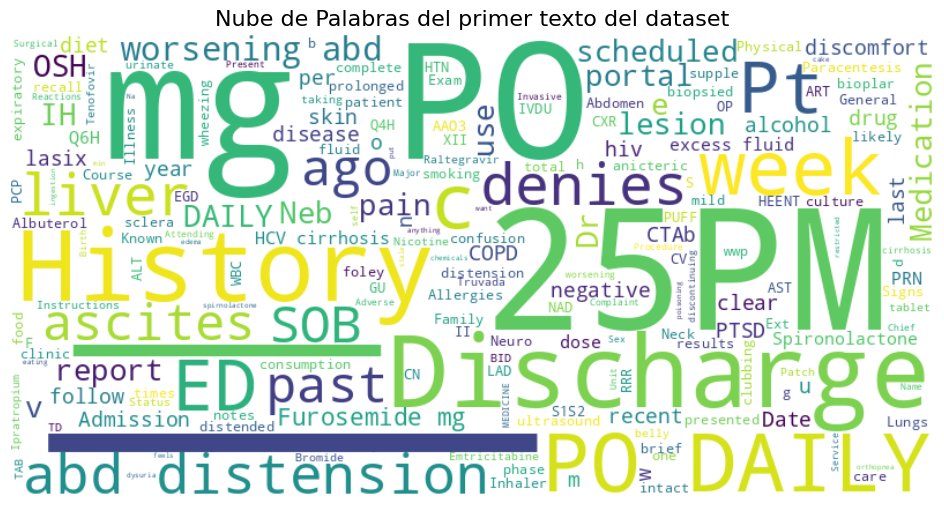

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

texto_total = """\nName: ___ Unit No: ___\n \nAdmission Date: ___ Discharge Date: ___\n \nDate of Birth: ___ Sex: F\n \nService: MEDICINE\n \nAllergies: \nNo Known Allergies / Adverse Drug Reactions\n \nAttending: ___\n \nChief Complaint:\nWorsening ABD distension and pain \n \nMajor Surgical or Invasive Procedure:\nParacentesis\n\n \nHistory of Present Illness:\n___ HCV cirrhosis c/b ascites, hiv on ART, h/o IVDU, COPD, \nbioplar, PTSD, presented from OSH ED with worsening abd \ndistension over past week. \nPt reports self-discontinuing lasix and spirnolactone ___ weeks \nago, because she feels like "they don't do anything" and that \nshe "doesn't want to put more chemicals in her." She does not \nfollow Na-restricted diets. In the past week, she notes that she \nhas been having worsening abd distension and discomfort. She \ndenies ___ edema, or SOB, or orthopnea. She denies f/c/n/v, d/c, \ndysuria. She had food poisoning a week ago from eating stale \ncake (n/v 20 min after food ingestion), which resolved the same \nday. She denies other recent illness or sick contacts. She notes \nthat she has been noticing gum bleeding while brushing her teeth \nin recent weeks. she denies easy bruising, melena, BRBPR, \nhemetesis, hemoptysis, or hematuria. \nBecause of her abd pain, she went to OSH ED and was transferred \nto ___ for further care. Per ED report, pt has brief period of \nconfusion - she did not recall the ultrasound or bloodwork at \nosh. She denies recent drug use or alcohol use. She denies \nfeeling confused, but reports that she is forgetful at times. \nIn the ED, initial vitals were 98.4 70 106/63 16 97%RA \nLabs notable for ALT/AST/AP ___ ___: ___, \nTbili1.6, WBC 5K, platelet 77, INR 1.6 \n\n \nPast Medical History:\n1. HCV Cirrhosis \n2. No history of abnormal Pap smears. \n3. She had calcification in her breast, which was removed \npreviously and per patient not, it was benign. \n4. For HIV disease, she is being followed by Dr. ___ Dr. \n___. \n5. COPD \n6. Past history of smoking. \n7. She also had a skin lesion, which was biopsied and showed \nskin cancer per patient report and is scheduled for a complete \nremoval of the skin lesion in ___ of this year. \n8. She also had another lesion in her forehead with purple \ndiscoloration. It was biopsied to exclude the possibility of \n___'s sarcoma, the results is pending. \n9. A 15 mm hypoechoic lesion on her ultrasound on ___ \nand is being monitored by an MRI. \n10. History of dysplasia of anus in ___. \n11. Bipolar affective disorder, currently manic, mild, and PTSD. \n \n12. History of cocaine and heroin use. \n\n \nSocial History:\n___\nFamily History:\nShe a total of five siblings, but she is not \ntalking to most of them. She only has one brother that she is in \n \ntouch with and lives in ___. She is not aware of any \nknown GI or liver disease in her family. \nHer last alcohol consumption was one drink two months ago. No \nregular alcohol consumption. Last drug use ___ years ago. She \nquit smoking a couple of years ago. \n\n \nPhysical Exam:\nVS: 98.1 107/61 78 18 97RA \nGeneral: in NAD \nHEENT: CTAB, anicteric sclera, OP clear \nNeck: supple, no LAD \nCV: RRR,S1S2, no m/r/g \nLungs: CTAb, prolonged expiratory phase, no w/r/r \nAbdomen: distended, mild diffuse tenderness, +flank dullness, \ncannot percuss liver/spleen edge ___ distension \nGU: no foley \nExt: wwp, no c/e/e, + clubbing \nNeuro: AAO3, converse normally, able to recall 3 times after 5 \nminutes, CN II-XII intact \n\nDischarge:\n\nPHYSICAL EXAMINATION: \nVS: 98 105/70 95\nGeneral: in NAD \nHEENT: anicteric sclera, OP clear \nNeck: supple, no LAD \nCV: RRR,S1S2, no m/r/g \nLungs: CTAb, prolonged expiratory phase, no w/r/r \nAbdomen: distended but improved, TTP in RUQ, \nGU: no foley \nExt: wwp, no c/e/e, + clubbing \nNeuro: AAO3, CN II-XII intact \n\n \nPertinent Results:\n___ 10:25PM GLUCOSE-109* UREA N-25* CREAT-0.3* SODIUM-138 \nPOTASSIUM-3.4 CHLORIDE-105 TOTAL CO2-27 ANION GAP-9\n___ 10:25PM estGFR-Using this\n___ 10:25PM ALT(SGPT)-100* AST(SGOT)-114* ALK PHOS-114* \nTOT BILI-1.6*\n___ 10:25PM LIPASE-77*\n___ 10:25PM ALBUMIN-3.3*\n___ 10:25PM WBC-5.0# RBC-4.29 HGB-14.3 HCT-42.6 MCV-99* \nMCH-33.3* MCHC-33.5 RDW-15.7*\n___ 10:25PM NEUTS-70.3* LYMPHS-16.5* MONOS-8.1 EOS-4.2* \nBASOS-0.8\n___ 10:25PM PLT COUNT-71*\n___ 10:25PM ___ PTT-30.9 ___\n___ 10:25PM ___\n.\n\nCXR: No acute cardiopulmonary process. \nU/S: \n1. Nodular appearance of the liver compatible with cirrhosis. \nSigns of portal \nhypertension including small amount of ascites and splenomegaly. \n \n2. Cholelithiasis. \n3. Patent portal veins with normal hepatopetal flow. \nDiagnostic para attempted in the ED, unsuccessful. \nOn the floor, pt c/o abd distension and discomfort.\n \nBrief Hospital Course:\n___ HCV cirrhosis c/b ascites, hiv on ART, h/o IVDU, COPD, \nbioplar, PTSD, presented from OSH ED with worsening abd \ndistension over past week and confusion. \n\n# Ascites - p/w worsening abd distension and discomfort for last \nweek. likely ___ portal HTN given underlying liver disease, \nthough no ascitic fluid available on night of admission. No \nsigns of heart failure noted on exam. This was ___ to med \nnon-compliance and lack of diet restriction. SBP negative\ndiuretics: \n> Furosemide 40 mg PO DAILY \n> Spironolactone 50 mg PO DAILY, chosen over the usual 100mg \ndose d/t K+ of 4.5. \n CXR was wnl, UA negative, Urine culture blood culture negative. \n \nPt was losing excess fluid appropriately with stable lytes on \nthe above regimen. Pt was scheduled with current PCP for \n___ check upon discharge. \nPt was scheduled for new PCP with Dr. ___ at ___ and \nfollow up in Liver clinic to schedule outpatient screening EGD \nand ___. \n \n\n \nMedications on Admission:\nThe Preadmission Medication list is accurate and complete.\n1. Furosemide 20 mg PO DAILY \n2. Spironolactone 50 mg PO DAILY \n3. Albuterol Inhaler 2 PUFF IH Q4H:PRN wheezing, SOB \n4. Raltegravir 400 mg PO BID \n5. Emtricitabine-Tenofovir (Truvada) 1 TAB PO DAILY \n6. Nicotine Patch 14 mg TD DAILY \n7. Ipratropium Bromide Neb 1 NEB IH Q6H SOB \n\n \nDischarge Medications:\n1. Albuterol Inhaler 2 PUFF IH Q4H:PRN wheezing, SOB \n2. Emtricitabine-Tenofovir (Truvada) 1 TAB PO DAILY \n3. Furosemide 40 mg PO DAILY \nRX *furosemide 40 mg 1 tablet(s) by mouth Daily Disp #*30 Tablet \nRefills:*3\n4. Ipratropium Bromide Neb 1 NEB IH Q6H SOB \n5. Nicotine Patch 14 mg TD DAILY \n6. Raltegravir 400 mg PO BID \n7. Spironolactone 50 mg PO DAILY \n8. Acetaminophen 500 mg PO Q6H:PRN pain \n\n \nDischarge Disposition:\nHome\n \nDischarge Diagnosis:\nAscites from Portal HTN\n\n \nDischarge Condition:\nMental Status: Clear and coherent.\nLevel of Consciousness: Alert and interactive.\nActivity Status: Ambulatory - Independent.\n\n \nDischarge Instructions:\nDear Ms. ___,\nIt was a pleasure taking care of you! You came to us with \nstomach pain and worsening distension. While you were here we \ndid a paracentesis to remove 1.5L of fluid from your belly. We \nalso placed you on you 40 mg of Lasix and 50 mg of Aldactone to \nhelp you urinate the excess fluid still in your belly. As we \ndiscussed, everyone has a different dose of lasix required to \nmake them urinate and it's likely that you weren't taking a high \nenough dose. Please take these medications daily to keep excess \nfluid off and eat a low salt diet. You will follow up with Dr. \n___ in liver clinic and from there have your colonoscopy \nand EGD scheduled. Of course, we are always here if you need us. \nWe wish you all the best!\nYour ___ Team. \n \nFollowup Instructions:\n___\n"""

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_total)

# Mostrarla
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras del primer texto del dataset", fontsize=16)
plt.show()


In [2]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('/datos_compartidos/RaulDatosMedicos/datasets/notes/dataset_notes_unificado.csv', dtype=str) 
print(df.head())

# Combina todo el texto de la columna 'text'
texto_total = ' '.join(df['text'].dropna().astype(str))

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_total)

# Mostrarla
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras de los textos del dataset", fontsize=16)
plt.show()


          note_id subject_id     hadm_id note_type note_seq  \
0  10000032-DS-21   10000032  22595853.0        DS     21.0   
1  10000032-DS-22   10000032  22841357.0        DS     22.0   
2  10000032-DS-23   10000032  29079034.0        DS     23.0   
3  10000032-DS-24   10000032  25742920.0        DS     24.0   
4  10000084-DS-17   10000084  23052089.0        DS     17.0   

             charttime            storetime  \
0  2180-05-07 00:00:00  2180-05-09 15:26:00   
1  2180-06-27 00:00:00  2180-07-01 10:15:00   
2  2180-07-25 00:00:00  2180-07-25 21:42:00   
3  2180-08-07 00:00:00  2180-08-10 05:43:00   
4  2160-11-25 00:00:00  2160-11-25 15:09:00   

                                                text field_name field_value  \
0   \nName:  ___                     Unit No:   _...        NaN         NaN   
1   \nName:  ___                     Unit No:   _...        NaN         NaN   
2   \nName:  ___                     Unit No:   _...        NaN         NaN   
3   \nName:  ___      

: 